In [32]:
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [33]:
df=pd.read_csv('penguins.csv')

df


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [34]:
print(df.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [35]:
df = df.dropna()
print(df.describe())
print(df.isnull().sum())



       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        335.000000       335.000000         335.000000   335.000000
mean          43.988358        17.169552         214.355224  4209.179104
std            5.453430         1.971966         263.253508   803.633495
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.550000        18.700000         213.000000  4787.500000
max           59.600000        21.500000        5000.000000  6300.000000
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df.loc[:, 'sex'] = label_encoder.fit_transform(df['sex'])
df


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,2
342,45.2,14.8,212.0,5200.0,1


In [37]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)

In [39]:
pca_columns = ['PC1', 'PC2', 'PC3']
pca_mid = pd.DataFrame(pca_result, columns=pca_columns)


In [40]:
from sklearn.model_selection import train_test_split
pca_train, pca_test = train_test_split(pca_mid, test_size=0.2, random_state=42)

In [41]:
pca_=pca_train.copy()

In [42]:
#find k value
#elbow plot

def optimise(df,max_k):
    means=[]
    inertia=[]

    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(df)

        means.append(k)
        inertia.append(kmeans.inertia_)

    #generate elbow plot
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertia,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('inertia(WCSS)')
    plt.grid(True)
    plt.show()
    


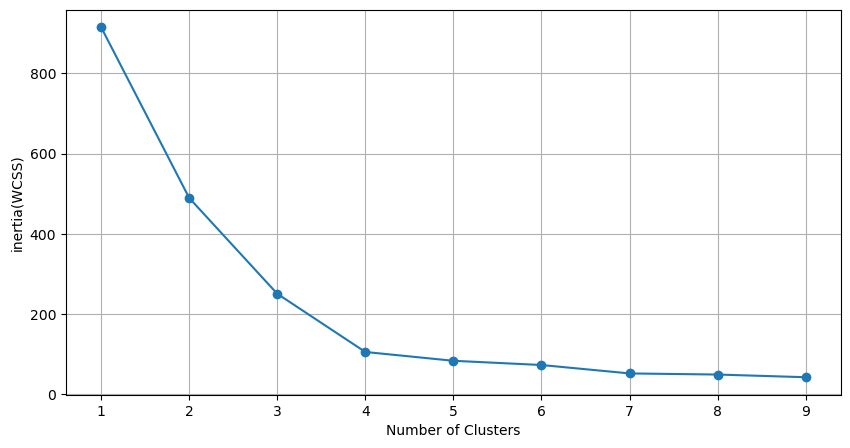

In [43]:
optimise(pca_,10)

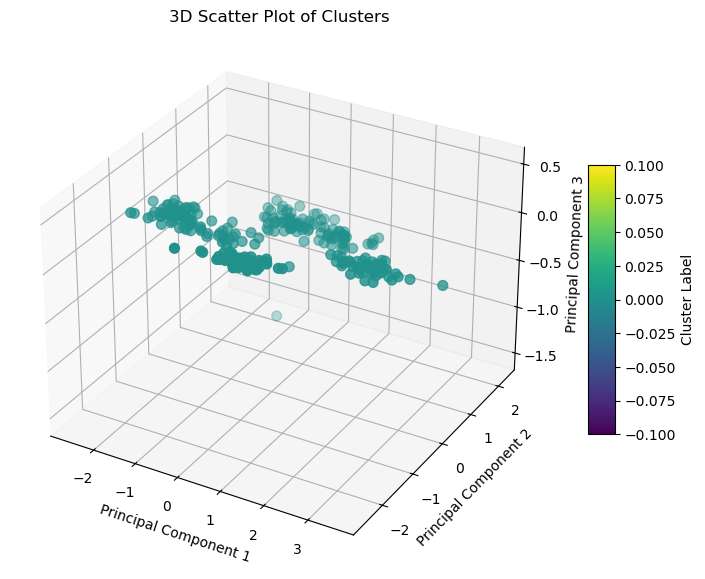

k= 1


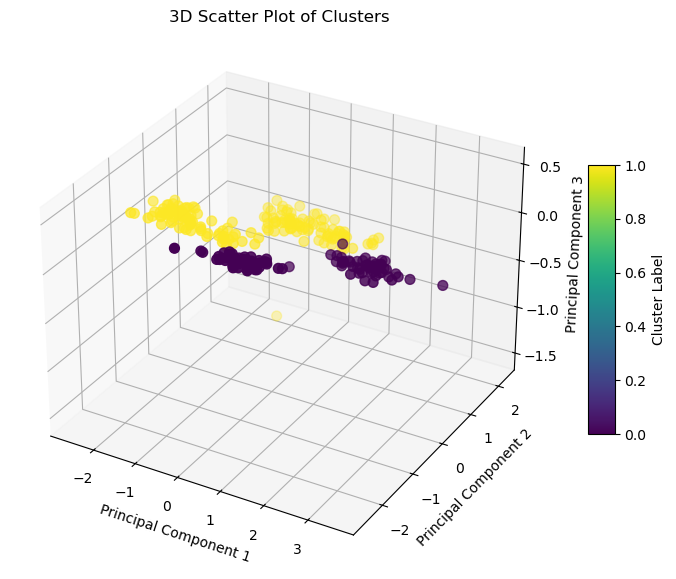

k= 2


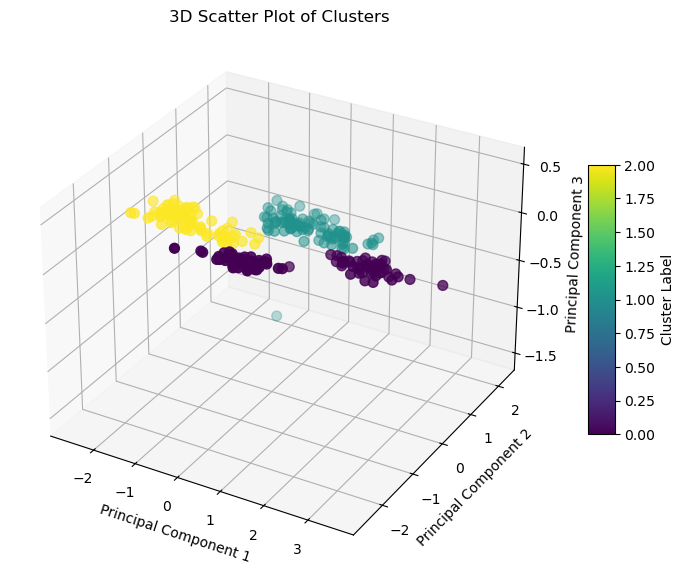

k= 3


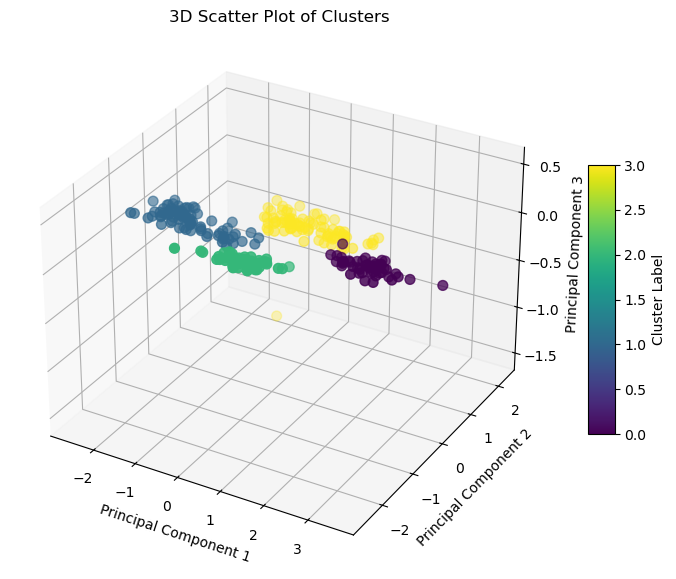

k= 4


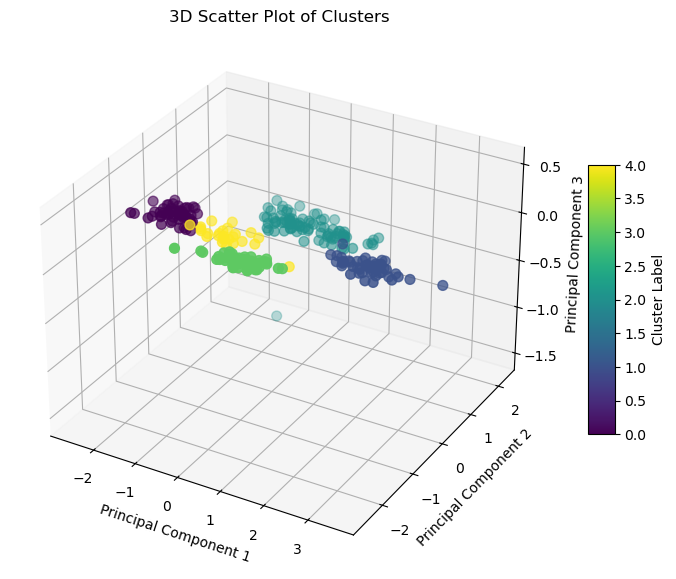

k= 5


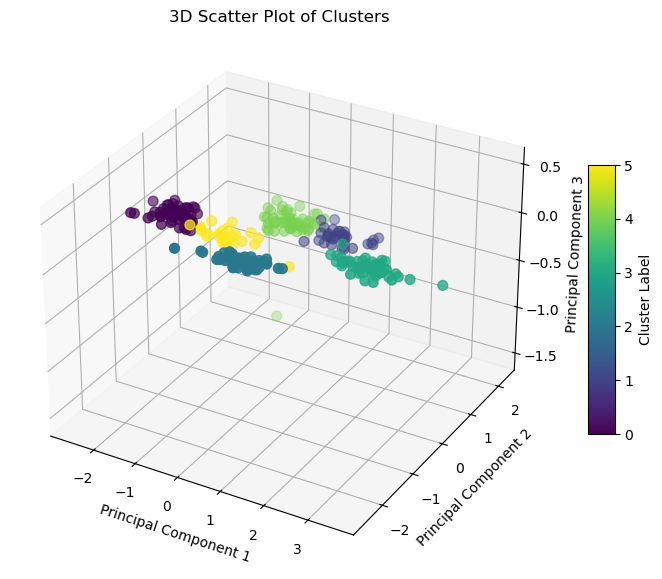

k= 6


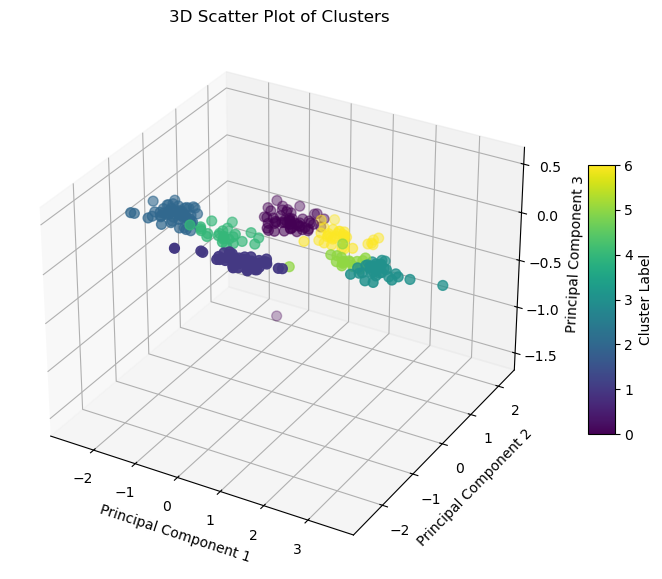

k= 7


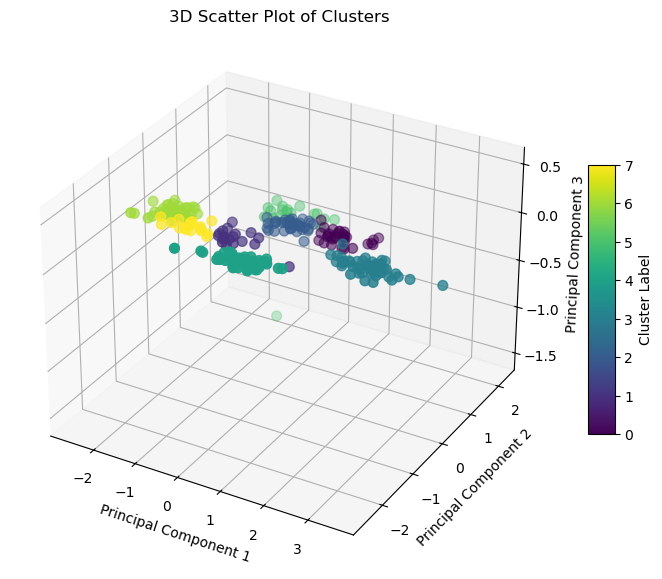

k= 8


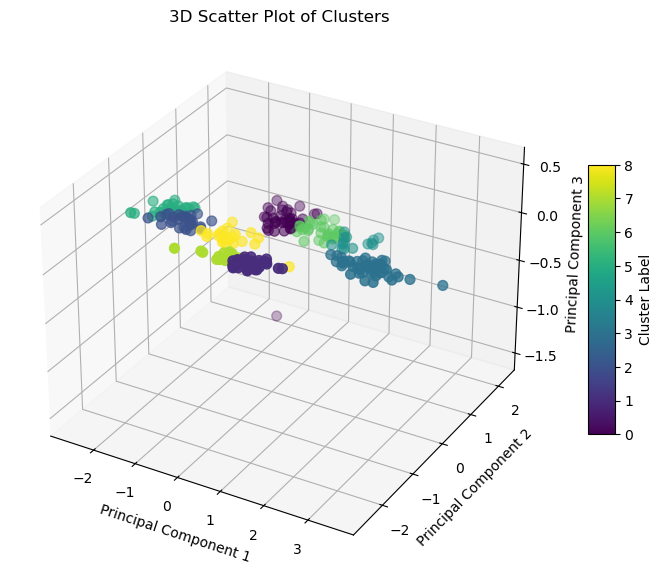

k= 9


In [44]:
#optimal value of k is 4
#to verify, plot all and see


num_clusters=range(1,10)
from mpl_toolkits.mplot3d import Axes3D
for i in num_clusters:
    pca_df=pca_.copy(deep=True)
    kmeans=KMeans(n_clusters=i)
    pca_['kmeans'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

    pca_train['kmeans']=kmeans.labels_

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
        c=pca_['kmeans'], cmap='viridis', s=50
    )

    ax.set_title("3D Scatter Plot of Clusters")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")

    legend = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
    legend.set_label("Cluster Label")
    plt.show()
    print('k=',i)

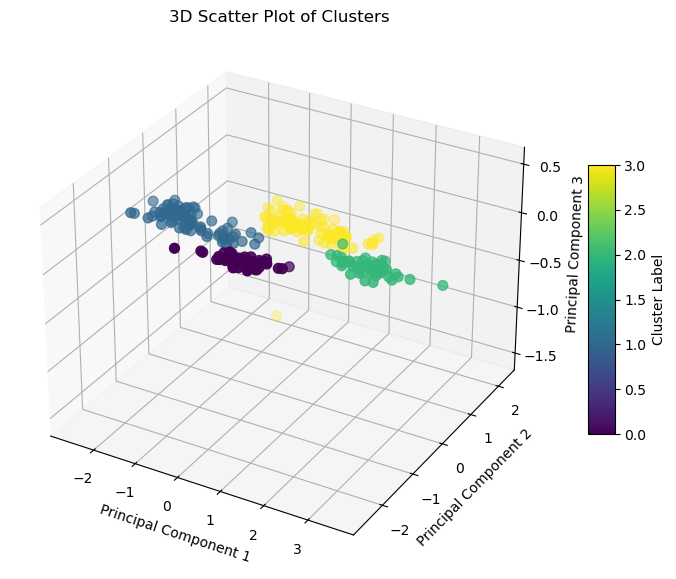

k= 4


In [45]:
pca_df=pca_.copy(deep=True)
kmeans=KMeans(n_clusters=4)
pca_['kmeans'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])

pca_train['kmeans']=kmeans.labels_

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], 
    c=pca_['kmeans'], cmap='viridis', s=50
)

ax.set_title("3D Scatter Plot of Clusters")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

legend = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
legend.set_label("Cluster Label")
plt.show()
print('k=',4)

In [46]:
pred_cluster = kmeans.predict(pca_test)
pred_cluster

array([3, 1, 3, 1, 1, 2, 0, 3, 0, 3, 3, 3, 2, 2, 3, 3, 1, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 1, 3, 1, 1, 3, 2, 1, 0, 2, 0, 1, 2, 3, 2, 1, 3, 1, 3,
       0, 3, 1, 1, 1, 1, 2, 1, 3, 1, 0, 1, 1, 3, 3, 1, 3, 1, 2, 2, 3, 3,
       2], dtype=int32)